<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/used_car_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###create a python script that can load the dataset to a pandas dataframe. The dataset file already has the headers in the first row.

###Write the prompt to generate the said code and test it in the JupyterLite environment. For verification of appropriate loading, include a step for printing the first 5 values of the loaded dataframe.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV


In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [6]:
# Load the dataset into a pandas dataframe
df = pd.read_csv(URL)

# Print the first 5 values of the loaded dataframe
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [7]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Fill blank cells with the average value of the columns
for column in columns_with_missing_values:
    average_value = df[column].mean()
    df[column].fillna(average_value, inplace=True)

# Identify and drop duplicate entries
df.drop_duplicates(inplace=True)

# Print the first 5 values of the cleaned dataframe
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the correlation matrix by the "price" parameter
sorted_correlation = correlation_matrix["price"].sort_values(ascending=False)

# Get the top 5 attributes with the highest correlation
top_5_attributes = sorted_correlation.index[1:6]

# Print the top 5 attributes with the highest correlation
print(top_5_attributes)

Index(['year', 'engineSize', 'tax', 'mpg', 'mileage'], dtype='object')


<ipython-input-8-d03841a25ffa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [10]:
# Count the number of cars under each unique value of the "fuelType" attribute
fuelType_counts = df["fuelType"].value_counts()

# Print the counts
fuelType_counts

Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

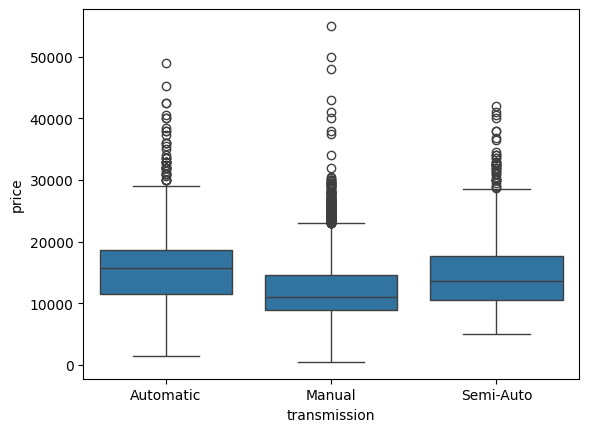

In [21]:
# Create a box plot using the Seaborn library
sns.boxplot(x="transmission", y="price", data=df)

# Display the plotP
plt.show()

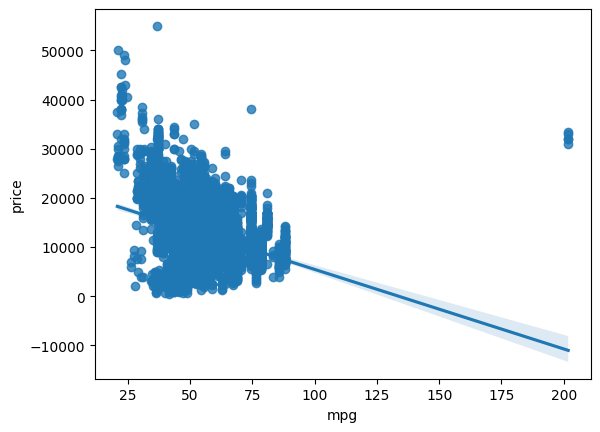

In [22]:
# Generate a regression plot using the Seaborn library
sns.regplot(x="mpg", y="price", data=df)

# Display the plot
plt.show()

In [24]:
# Split the data into training and testing sets
X = df[["mpg"]]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the R^2 and MSE values
print("R^2 score:", r2)
print("Mean squared error:", mse)

R^2 score: 0.1504343741072468
Mean squared error: 19049855.14011078


In [25]:
# Split the data into training and testing sets
X = df[["year", "mileage", "tax", "mpg", "engineSize"]]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the R^2 and MSE values
print("R^2 score:", r2)
print("Mean squared error:", mse)

R^2 score: 0.6917125923771601
Mean squared error: 6912744.910746604


In [27]:
# Create a pipeline model object
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the R^2 and MSE values
print("R^2 score:", r2)
print("Mean squared error:", mse)

R^2 score: 0.12122807147171055
Mean squared error: 19704749.614920236


In [29]:
# Create and fit a Ridge regression object
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the R^2 value
print("R^2 score:", r2)

R^2 score: 0.6917134446113233


In [31]:
# Perform a second-order polynomial transform on the training data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Perform a second-order polynomial transform on the testing data
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression object
model = Ridge(alpha=0.1)
model.fit(X_train_poly, y_train)

# Make predictions on the modified test set
y_pred_poly = model.predict(X_test_poly)

# Calculate the R^2 score
r2_poly = r2_score(y_test, y_pred_poly)

# Calculate the mean squared error
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Print the R^2 and MSE values
print("R^2 score:", r2_poly)
print("Mean squared error:", mse_poly)

R^2 score: 0.6732748726208025
Mean squared error: 7326174.879859914


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [35]:
# Define the set of values for alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Create a Ridge regression object
model = Ridge()

# Create a parameter grid for Grid Search
param_grid = {'alpha': alpha_values}

# Perform Grid Search with 4-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Create and fit a Ridge regression object with the best alpha value
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the best alpha value and R^2 score
print("Best alpha value:", best_alpha)
print("R^2 score:", r2)

Best alpha value: 0.01
R^2 score: 0.6917126776418894


###By the end of this project, you are now capable of using Generative AI for the tasks of:



*   Data preparation - cleaning, transforming and augmentation
*   Data analysis - drawing insight, creating visualizations
* Model development - creating simple as well as complex prediction models
* Model refinement - found the optimum model using Grid Search